# IQ index for prioritizing samples

### Description
IQ is a molecular network-based spectral annotation novelty index developed for prioritizing samples according to the probability of finding novel chemistry using mass spectrometry. IQ uses three key network metrics: Library match score (MQS) for annotated nodes, cosine values between annotated and unannotated nodes (COS), and the proportion of annotated nodes.

### Usage 
This notebook requires the user to provide a graphml with metadata ATTRIBUTE_Species and ATTRIBUTE_Genus. All data will be added to Data file (IQ or IQNP) and plots to Plot file.

### Documentation
Please refer to the documentation page for more informations on the for IQ and IQNP worklow.

## Please read and follow the instructions below and run the notebook cells.

# Molecular network
Build the molecular network of your work (GNPS, MZmine...). The metadata must contain at least the information ATTRIBUTE_Species and ATTRIBUTE_Genus. (The names may change later)


In [1]:
# 0- Loading packages
install.packages(c("readr","igraph", "devtools","tidyr", "ggplot2", "dplyr","readxl", "rcdk"))
library(devtools)
library(igraph)
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(readxl)
library(rcdk)

package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\00LOCK\readr\libs\x64\readr.dll  a C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\readr\libs\x64\readr.dll: Permission denied"
Warning message:
"restored 'readr'"


package 'igraph' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'igraph'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\00LOCK\igraph\libs\x64\igraph.dll  a C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\igraph\libs\x64\igraph.dll: Permission denied"
Warning message:
"restored 'igraph'"


package 'devtools' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\00LOCK\tidyr\libs\x64\tidyr.dll  a C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\tidyr\libs\x64\tidyr.dll: Permission denied"
Warning message:
"restored 'tidyr'"


package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\00LOCK\dplyr\libs\x64\dplyr.dll  a C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"


package 'readxl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readxl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\00LOCK\readxl\libs\x64\readxl.dll  a C:\Users\dvenegas\AppData\Local\Programs\R\R-4.4.2\library\readxl\libs\x64\readxl.dll: Permission denied"
Warning message:
"restored 'readxl'"


package 'rcdk' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rcdk'"
Warning message:
"restored 'rcdk'"



The downloaded binary packages are in
	C:\Users\dvenegas\AppData\Local\Temp\RtmpsD961I\downloaded_packages


Warning message:
"package 'devtools' was built under R version 4.4.3"
Cargando paquete requerido: usethis


Adjuntando el paquete: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:igraph':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Adjuntando el paquete: 'tidyr'


The following object is masked from 'package:igraph':

    crossing


Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Cargando paquete requerido: rcdklibs

Cargando paquete requerido: rJava


Adjuntando el paquete: 'rcdk'


The following object is masked from 'package:tidyr':

    matches


The following object is masked from 'package:dplyr':

    matches



# 1- Load network from a GraphML file 
Upload your .graphml file on the MyBinder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon).

# 2- Specificy the filename of the uploaded graphml file
The string for the link/path must be between parenthesis, such as: "Actino_network.graphml"

In [2]:
# graphml <- read_graph("Actino_network.graphml", format = "graphml")
# Metadata <- read_delim("Metadata_Actinomyces.csv", delim = ";", escape_double = FALSE, trim_ws = TRUE)

graphml <- read_graph("Actino_network.graphml", format = "graphml")
Metadata <- read_delim("Metadata_Actinomyces.csv", 
                       delim = ";", escape_double = FALSE, trim_ws = TRUE)

Rows: 15 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): filename, ATTRIBUTE_Bacteria, ATTRIBUTE_Strain

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 3 - IQ parameters weighing

In [3]:
# Weighing
Weigh_Ans <- 0.33
Weigh_Hcos <- 0.33
Weigh_Hmqs <- 0.33

# 4 - Get network data

In [4]:
# Get node and edge data from the graph
if (is_igraph(graphml)) {
  df_edges <- get.data.frame(graphml, what = "edges")
  df_nodes <- get.data.frame(graphml, what = "vertices")
}  

Warning message:
"`get.data.frame()` was deprecated in igraph 2.0.0.
ℹ Please use `as_data_frame()` instead."


# 5 - Attribute change name

In [7]:
#colnames(df_nodes)[colnames(df_nodes) == "ATTRIBUTE_actualname"] <- "ATTRIBUTE_Species"
colnames(df_nodes)[colnames(df_nodes) == "ATTRIBUTE_Strain"] <- "ATTRIBUTE_Species"
colnames(df_nodes)[colnames(df_nodes) == "ATTRIBUTE_Bacteria"] <- "ATTRIBUTE_Genus"

#colnames(Metadata)[colnames(Metadata) == "ATTRIBUTE_actualname"] <- "ATTRIBUTE_Genus"
colnames(Metadata)[colnames(Metadata) == "ATTRIBUTE_Strain"] <- "ATTRIBUTE_Species"
colnames(Metadata)[colnames(Metadata) == "ATTRIBUTE_Bacteria"] <- "ATTRIBUTE_Genus"


# 6 - Run the workflow

Adding missing grouping variables: `ATTRIBUTE_Species`
Adding missing grouping variables: `ATTRIBUTE_Species`
Adding missing grouping variables: `ATTRIBUTE_Species`
Adding missing grouping variables: `ATTRIBUTE_Species`


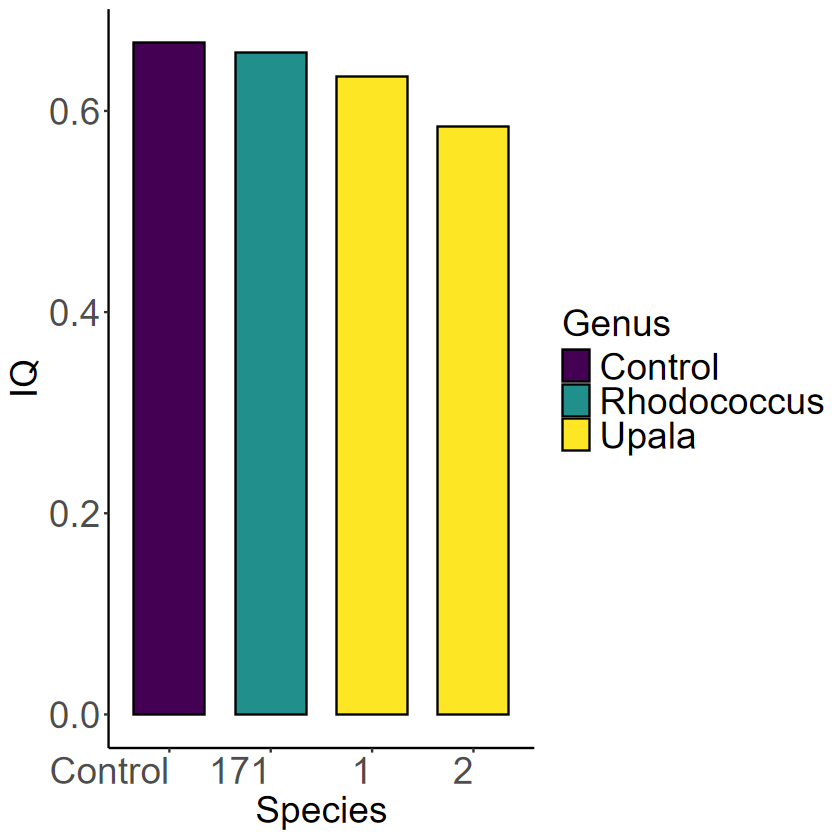

In [8]:
### Calculate total nodes per sample
Total_nodes_per_Species <- df_nodes %>%
  select(id, ATTRIBUTE_Species, MQScore) %>% 
  separate_rows(ATTRIBUTE_Species, sep = "\\,") %>%  
  group_by(ATTRIBUTE_Species)

# Count total nodes per Species
Total_nodes <- table(Total_nodes_per_Species$ATTRIBUTE_Species)
Total_nodes <- as.data.frame(Total_nodes)
colnames(Total_nodes) <- c("ATTRIBUTE_Species", "Count")

# Extract index inputs for MQS
score_MQS <- Total_nodes_per_Species %>%
  filter(!is.na(MQScore) & MQScore != "")

# Count nodes with annotated strain information
nodes_annotated_Species <- table(score_MQS$ATTRIBUTE_Species)
nodes_annotated_Species <- as.data.frame(nodes_annotated_Species)
colnames(nodes_annotated_Species) <- c("ATTRIBUTE_Species", "Count")

## Define strata for MQScore
MQS_breaks <- seq(0.00, 1, by = 0.05)
strata_MQS <- setNames(
  lapply(seq_along(MQS_breaks)[-length(MQS_breaks)], function(i) c(MQS_breaks[i], MQS_breaks[i + 1])),
  paste0(sprintf("%.2f", MQS_breaks[-length(MQS_breaks)]), "-", sprintf("%.2f", MQS_breaks[-1])))

## Function to stratify and count values, ignoring NAs
stratify_and_count_unique <- function(df, column, strata) {
  unique_df <- df %>% 
    group_by(id) %>% 
    slice(1) %>%  # Count only the first occurrence of each unique identifier (id) in the specified column
    ungroup()
  
  # Count unique values for each stratum
  counts <- sapply(strata, function(range) {
    sum(unique_df[[column]] >= range[1] & unique_df[[column]] < range[2], na.rm = TRUE)
  })
  
  return(counts)
}  

## Create lists to store individual dataframes and strata counts
individual_dfs <- list()
strata_counts <- list()

## For each sample, create an individual dataframe and calculate strata counts
for (sample_name in unique(score_MQS$ATTRIBUTE_Species)) {
  individual_df <- score_MQS %>%
    filter(ATTRIBUTE_Species == sample_name) %>%
    select(id, MQScore)
  
  # Count unique values in each stratum for MQScore
  MQScore_counts <- stratify_and_count_unique(individual_df, "MQScore", strata_MQS)
  
  # Ensure that the strata names are consistent
  counts_df <- data.frame(
    Stratum = names(strata_MQS),
    MQScore_Count = MQScore_counts
  )
  
  # Store the count dataframe in the list
  strata_counts[[sample_name]] <- counts_df
  
  # Assign the individual dataframe to the list
  individual_dfs[[sample_name]] <- individual_df
}

if (!dir.exists("Data/CSV_IQ")) {
  dir.create("Data/CSV_IQ", recursive = TRUE)
}


## Save each individual dataframe and the strata counts to CSV files in the CSV_IQ folder
for(sample_name in names(individual_dfs)) {
  write.csv(individual_dfs[[sample_name]], file = paste0("Data/CSV_IQ/", sample_name, "_data_MQS.csv"), row.names = FALSE)
  
  
  # Assign each dataframe to a variable in the R environment
  assign(paste0("data_",sample_name), individual_df)
  assign(paste0("strata_counts_",sample_name), counts_df)
}    

## Create a data frame to store Specie names
Species <- data.frame(Total_nodes$ATTRIBUTE_Species)
colnames(Species) <- c("Species")
Species <- Species$Species

## Create an empty dataframe for the summary
shannon_summary_MQS <- data.frame(Specie = character(), Shannon_Index = numeric(), stringsAsFactors = FALSE)

## Iterate over each strain
for (Species in Species) {
  # Name of the corresponding dataframe
  df_name <- paste0("strata_counts_",Species)
  
  # Check if the dataframe exists
  if (exists(df_name)) {
    df_strata_counts <- get(df_name)
    
    # Obtain the total count for this strain from Total_nodes
    total <- Total_nodes$Count[Total_nodes$ATTRIBUTE_Species == Species]
    
    # Check that the total is greater than zero
    if (total > 0) {
      # Calculate the proportion (pi) for each stratum and add it as a new column
      df_strata_counts$pi <- df_strata_counts$MQScore_Count / total
      
      # Add a column with the total count
      df_strata_counts$Total <- total
      
      # Calculate pi * ln(pi), handling the case where pi = 0
      df_strata_counts$pi_ln_pi <- ifelse(df_strata_counts$pi > 0, df_strata_counts$pi * log(df_strata_counts$pi), 0)
    } else {
      # If the total is zero, assign NA to the new columns
      df_strata_counts$pi <- NA
      df_strata_counts$Total <- NA
      df_strata_counts$pi_ln_pi <- NA
    }
    
    # Calculate the Shannon index as -sum(pi * ln(pi))
    shannon_index <- -sum(df_strata_counts$pi_ln_pi, na.rm = TRUE)
    
    # Add the Shannon index as a new column (same for all strata)
    df_strata_counts$shannon_index <- shannon_index
    
    # Append the Shannon index to the summary
    shannon_summary_MQS <- rbind(shannon_summary_MQS, data.frame(Species = Species, Shannon_Index = shannon_index))
    
    # Select only the relevant columns before saving
    df_strata_counts <- df_strata_counts[, c("Stratum", "MQScore_Count", "pi", "Total", "pi_ln_pi", "shannon_index")]
    
    # Save the updated dataframe to a CSV file
    write.csv(df_strata_counts, file = paste0("Data/CSV_IQ/", df_name, "_SI_MQS.csv"), row.names = FALSE)
  } else {
    warning(paste("The dataframe", df_name, "does not exist."))
  }
}    

## Save Shannon Index summary to a CSV file
write.csv(shannon_summary_MQS, file = "Data/CSV_IQ/1_MQS_shannon_index_summary.csv", row.names = FALSE)


# Extract index input: COS_score

# Get cosine scores where node2 matches the id in score_MQS
score_COS_node1 <- df_edges %>%
  select(node1, cosine_score, node2) %>%
  semi_join(score_MQS, by = c("node2" = "id")) # Retrieve cosine values from node to node

# Get complementary cosine scores where node1 matches the id in score_MQS
score_COS_node2 <- df_edges %>%
  select(node2, cosine_score, node1) %>%
  semi_join(score_MQS, by = c("node1" = "id")) # Retrieve complementary cosine values

## Combine interactions into a single dataframe
combined_interactions <- bind_rows(
  score_COS_node1 %>% mutate(direction = "Score_COS_node1"),
  score_COS_node2 %>% mutate(direction = "Score_COS_node2")
) # Add a new column called direction to indicate the source node of the interaction.

# Create a combined node column based on direction
combined_interactions <- combined_interactions %>% mutate(
  combined_nodes = ifelse(direction == "Score_COS_node1",
                          paste(node1, node2, sep = "/"),
                          paste(node2, node1, sep = "/"))
) # If “Score_COS_node1”, concatenate node1 and node2; else, concatenate node2 and node1.

# Separate combined nodes into nodeA and nodeB
combined_interactions <- combined_interactions %>%
  separate(combined_nodes, into = c("nodeA", "nodeB"), sep = "/") # Assign nodeA as the node of interest.

## Remove rows where nodeA and nodeB are the same (singlets)
combined_interactions <- combined_interactions[combined_interactions$nodeA != combined_interactions$nodeB, ]

# Select relevant columns for cosine scores
score_COS <- combined_interactions %>%
  select(nodeA, cosine_score) # Filter cosine values for the node of interest.

# Merge cosine scores with node metadata
score_COS <- merge(score_COS, df_nodes, by.x = "nodeA", by.y = "id", all = TRUE)  
# Note: MQS values are repeated when there are multiple COS scores, as intended.

# Clean up score_COS dataframe
score_COS <- score_COS %>% select(nodeA, cosine_score, ATTRIBUTE_Species) %>% 
  filter(!is.na(cosine_score) & cosine_score != "") %>% 
  separate_rows(ATTRIBUTE_Species, sep = "\\,") %>%  
  group_by(ATTRIBUTE_Species)

# Rename columns for clarity
colnames(score_COS) <- c("id", "Cosine_score", "ATTRIBUTE_Species") 

# Merge with metadata to include additional information
score_COS <- merge(score_COS, Metadata, 
                   by.x = "ATTRIBUTE_Species", by.y = "ATTRIBUTE_Species", all.x = TRUE)

# Final selection of relevant columns
score_COS <- score_COS %>% select(id, Cosine_score, ATTRIBUTE_Species)

## Define strata for cosine score
cos_breaks <- seq(0.70, 1.00, by = 0.05) # Define breaks for cosine scores
strata_COS <- setNames(
  lapply(seq_along(cos_breaks)[-length(cos_breaks)], function(i) c(cos_breaks[i], cos_breaks[i + 1])),
  paste0(sprintf("%.2f", cos_breaks[-length(cos_breaks)]), "-", sprintf("%.2f", cos_breaks[-1])))

## Function to stratify and count values, ignoring NAs
stratify_and_count <- function(df, column, strata) {
  counts <- sapply(strata, function(range) {
    sum(df[[column]] >= range[1] & df[[column]] < range[2], na.rm = TRUE) # Count values within each stratum
  })
  return(counts)
}

## Create lists to save individual df and strata counts
individual_dfs_COS <- list()
strata_counts_COS <- list()

## For each sample, create an individual df and strata counts
for (sample_name in unique(score_COS$ATTRIBUTE_Species)) {
  individual_df <- score_COS %>%
    filter(ATTRIBUTE_Species == sample_name) %>%
    select(id, Cosine_score)
  
  # Counting unique values in each stratum for Cosine score
  cosine_score_counts <- stratify_and_count(individual_df, "Cosine_score", strata_COS)
  
  # Create a dataframe for the counts
  counts_df <- data.frame(Stratum = names(cosine_score_counts), Count = cosine_score_counts)
  
  # Store count dataframe in the list
  strata_counts_COS[[sample_name]] <- counts_df
  
  # Assign the individual dataframe to the list
  individual_dfs_COS[[sample_name]] <- individual_df
}    


## Save each individual dataframe and the strata counts to CSV files in the CSV_IQ folder
for(sample_name in names(individual_dfs_COS)) {
  write.csv(individual_dfs_COS[[sample_name]], file = paste0("Data/CSV_IQ/", sample_name, "_data_COS.csv"), row.names = FALSE)
  
  
  # Assign each dataframe to a variable in the R environment
  assign(paste0(sample_name, "_data_COS"), individual_dfs_COS[[sample_name]])
  assign(paste0(sample_name, "_strata_counts_COS"), strata_counts_COS[[sample_name]])
}

## name list (Species)
Species <- unique(Total_nodes$ATTRIBUTE_Species)

## df for summary
shannon_summary_cos <- data.frame(Species = character(), Shannon_Index = numeric(), stringsAsFactors = FALSE)

## Iterate each strain
for (Species in Species) {
  # df name
  df_name <- paste0(Species, "_strata_counts_COS")
  if (exists(df_name)) {
    df_strata_counts <- get(df_name)
    
    # obtain total node for each Specie from total_nodes
    total <- Total_nodes$Count[Total_nodes$ATTRIBUTE_Species == Species]
    
    if (total > 0) {
      if ("Count" %in% colnames(df_strata_counts)) {
        # Calculate the proportion (pi) for each stratum and add it as a new column
        df_strata_counts$pi <- df_strata_counts$Count / total
        
        # add a column with the total number
        df_strata_counts$Total <- total
        
        # calculate pi * ln(pi), handling the case of pi = 0
        df_strata_counts$pi_ln_pi <- ifelse(df_strata_counts$pi > 0, df_strata_counts$pi * log(df_strata_counts$pi), 0)
      } else {
        warning(paste("The column 'Count' does not exist in the dataframe", df_name))
        df_strata_counts$pi <- NA
        df_strata_counts$Total <- NA
        df_strata_counts$pi_ln_pi <- NA
      }
    } else {
      df_strata_counts$pi <- NA
      df_strata_counts$Total <- NA
      df_strata_counts$pi_ln_pi <- NA
    }
    # Calculate SI
    shannon_index <- -sum(df_strata_counts$pi_ln_pi, na.rm = TRUE)
    df_strata_counts$shannon_index <- shannon_index
    shannon_summary_cos <- rbind(shannon_summary_cos, data.frame(Species = Species, Shannon_Index = shannon_index))
    df_strata_counts <- df_strata_counts[, c("Stratum", "Count", "pi", "Total", "pi_ln_pi", "shannon_index")]
    
    
    write.csv(df_strata_counts, file = paste0("Data/CSV_IQ/", df_name, "_SI_COS.csv"), row.names = FALSE)
  } else {
    warning(paste("Dataframe", df_name, "does not exist."))
  }
}

write.csv(shannon_summary_cos, file = "Data/CSV_IQ/1_COS_shannon_index_summary.csv", row.names = FALSE)

# Annotated nodes per sample
Proportion_Annotated_nodes= merge(nodes_annotated_Species, Total_nodes, by.x = "ATTRIBUTE_Species", by.y = "ATTRIBUTE_Species")
Proportion_Annotated_nodes$Ans=Proportion_Annotated_nodes$Count.x/Proportion_Annotated_nodes$Count.y
Proportion_Annotated_nodes= Proportion_Annotated_nodes %>% select(-Count.x, -Count.y)

# Parameters union

IQ <- merge(Proportion_Annotated_nodes, shannon_summary_cos, by.x = "ATTRIBUTE_Species", by.y = "Species")
IQ <- merge(IQ, shannon_summary_MQS, by.x = "ATTRIBUTE_Species", by.y = "Species")
colnames(IQ)= c("ATTRIBUTE_Species", "Ans", "Hcos", "Hmqs")

# Scaling
IQ$Hcos[is.na(IQ$Hcos)] <- 0
IQ$Hmqs[is.na(IQ$Hmqs)] <- 0
IQ$Ans[is.na(IQ$Ans)] <- 0
IQ$Hmqs <- (IQ$Hmqs) / (max(IQ$Hmqs))
IQ$Hcos <- (IQ$Hcos) / (max(IQ$Hcos))

IQ$IQ <- (IQ$Ans * Weigh_Ans) + (IQ$Hcos * Weigh_Hcos) + (IQ$Hmqs * Weigh_Hmqs)

IQ = merge(IQ, Metadata, by.x = "ATTRIBUTE_Species", by.y = "ATTRIBUTE_Species")
IQ= IQ %>% select(IQ,Hmqs,Hcos, Ans, ATTRIBUTE_Genus, ATTRIBUTE_Species)
IQ <- IQ %>%
  distinct()

num_unique_strains <- nrow(IQ)    

# Create a custom cadet blue color gradient

# Create the plot with the new matte color palette and adjust the font size of the legend
IQ_plot = ggplot(IQ, aes(x = reorder(ATTRIBUTE_Species, -IQ), y = IQ, fill = ATTRIBUTE_Genus)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "Black", width = 0.7, show.legend = TRUE) +  
  theme_classic() + 
  labs(x = "Species",
       y = "IQ",
       fill = "Genus") +  # Legend label
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 22),  
    axis.text.x = element_text(angle = 0, hjust = 1, size = 22),  
    axis.text.y = element_text(size = 22),
    axis.title.y = element_text(size = 22),
    axis.title.x = element_text(size = 22),  
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.text = element_text(size = 22),  
    legend.title = element_text(size = 22)  
  )+ scale_fill_viridis_d()

IQ_plot 

if (!dir.exists("Data/IQ_Plot")) {
  dir.create("Data/IQ_Plot", recursive = TRUE)
}
ggsave("Data/IQ_Plot/1_IQ_Plot.png", plot = IQ_plot, width = 15, height = 8)
ggsave("Data/IQ_Plot/1_IQ_Plot.svg", plot = IQ_plot, width = 15, height = 8)

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


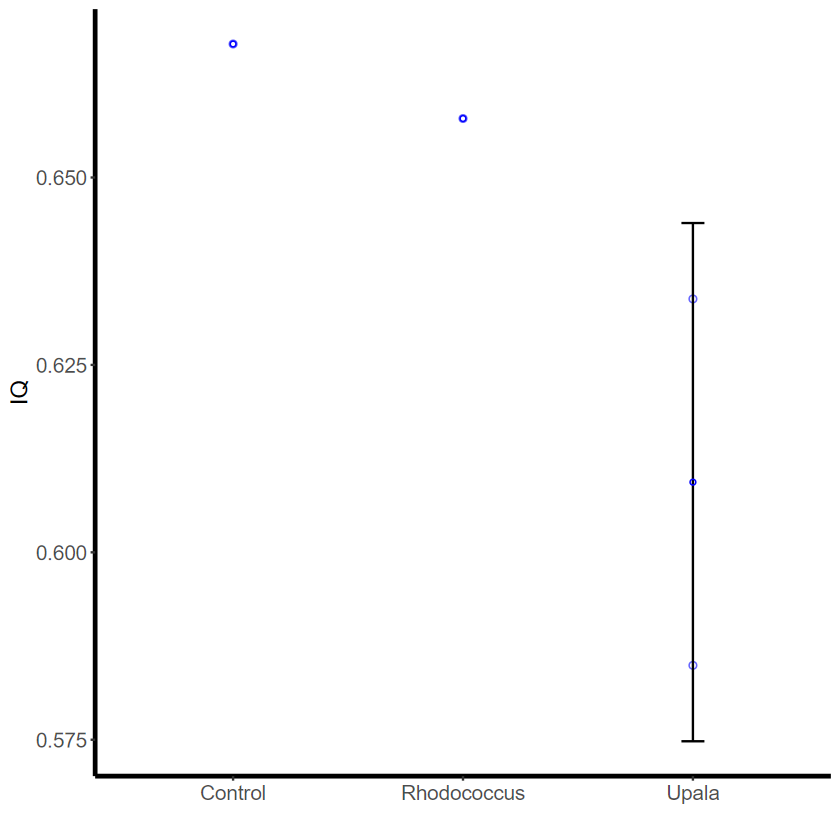

In [9]:

# Distribution Plot
summary_data <- IQ %>%
  group_by(ATTRIBUTE_Genus) %>%
  summarise(
    mean_IQ = mean(IQ, na.rm = TRUE),  # Calculate mean IQ
    sd_IQ = sd(IQ, na.rm = TRUE),      # Calculate standard deviation of IQ
    .groups = 'drop'                   # Drop grouping structure
  )

Distribution_plot = ggplot() +
  geom_point(data = IQ, aes(x = ATTRIBUTE_Genus, y = IQ), 
             shape = 1, color = "blue", size = 1.5, alpha = 0.6) + 
  geom_errorbar(data = summary_data, 
                aes(x = ATTRIBUTE_Genus, ymin = mean_IQ - sd_IQ, ymax = mean_IQ + sd_IQ), 
                width = 0.1, color = "black") + 
  geom_point(data = summary_data, aes(x = ATTRIBUTE_Genus, y = mean_IQ), 
             shape = 1, color = "blue", size = 1) + 
  labs(
    x = "", 
    y = "IQ") +
  theme_classic() +
  theme(
    axis.title.x = element_text(size = 14),  
    axis.title.y = element_text(size = 14),  
    axis.text.x = element_text(size = 12),    
    axis.text.y = element_text(size = 12),    
    axis.line = element_line(size = 1)        
  ) 

Distribution_plot

# Save the Distribution Plot as a PNG file
ggsave("Data/IQ_Plot/2_Distribution_plot.png", plot = Distribution_plot, width = 15, height = 8)    
ggsave("Data/IQ_Plot/2_Distribution_plot.svg", plot = Distribution_plot, width = 15, height = 8)    


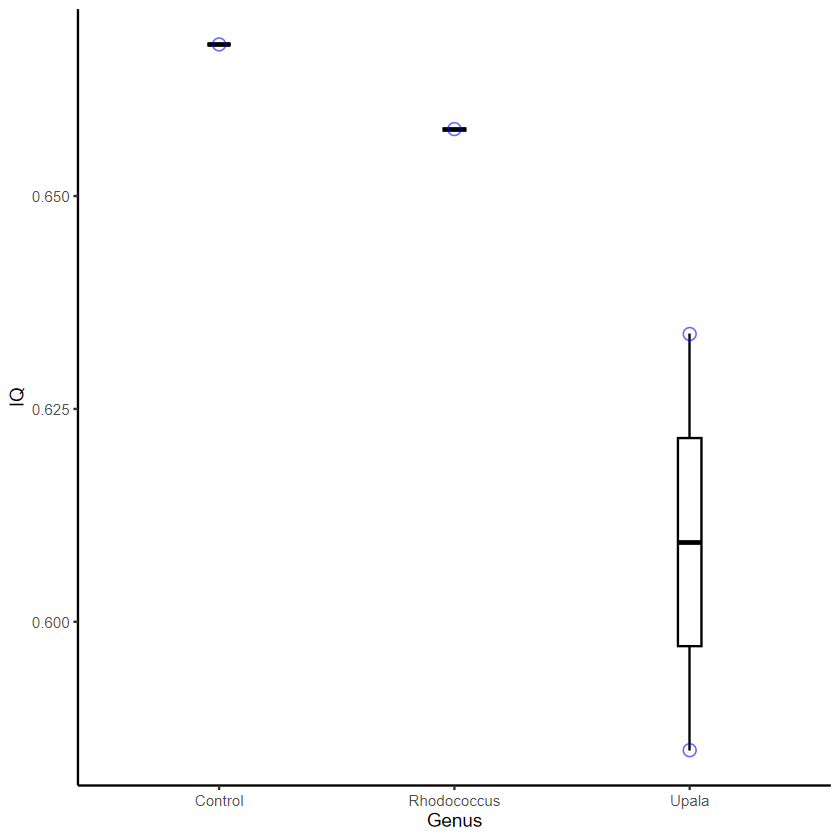

In [10]:
# Create Boxplot
Boxplot = ggplot(IQ, aes(x = ATTRIBUTE_Genus, y = IQ)) +
  geom_boxplot(outlier.shape = NA, fill = NA, color = "black", width = 0.1) +  # Boxplot without outliers
  geom_point(aes(color = "Individual Points"), shape = 1, size = 3, alpha = 0.6) +  # Individual points
  scale_color_manual(values = "blue") +  # Manual color for points
  labs(
    x = "Genus", 
    y = "IQ") +  # Axis labels
  theme_classic() +  # Minimalist theme
  theme(legend.position = "none")  # Remove legend

Boxplot    

# Save the Boxplot as a PNG file
ggsave("Data/IQ_Plot/3_Boxplot.png", plot = Boxplot, width = 15, height = 8)  
ggsave("Data/IQ_Plot/3_Boxplot.svg", plot = Boxplot, width = 15, height = 8)   

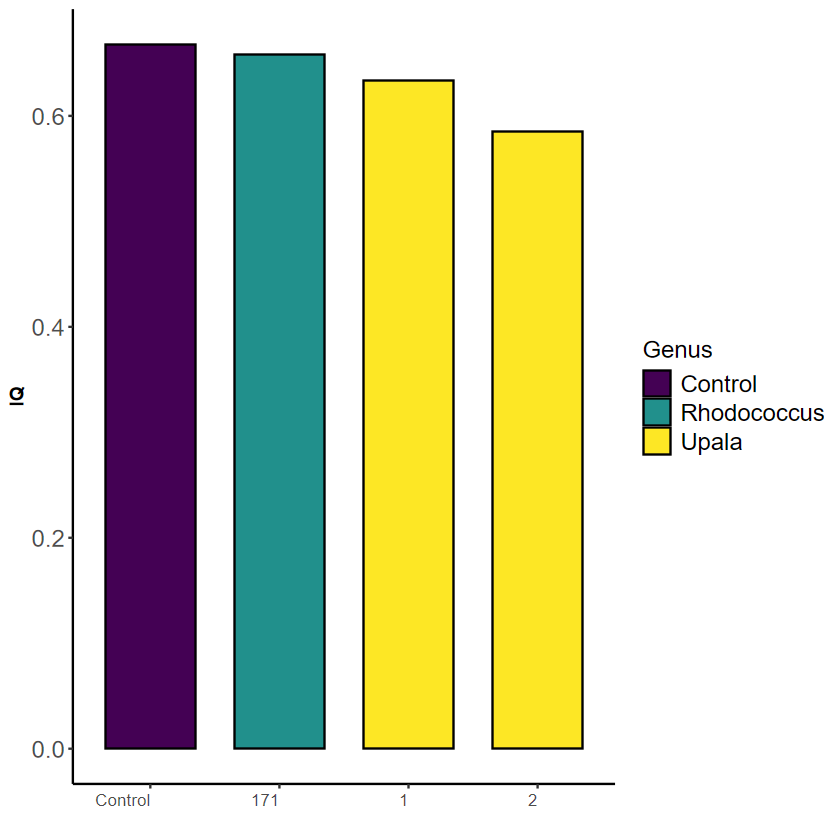

In [14]:
# Summary of top 10 lowest IQ
IQ_Summary_top <- IQ %>%
  arrange(IQ) %>%
  slice_head(n = 10)
## IQ top plot

IQ_top_plot = ggplot(IQ_Summary_top, aes(x = reorder(ATTRIBUTE_Species, -IQ), y = IQ, fill = ATTRIBUTE_Genus)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "Black", width = 0.7, show.legend = TRUE) +  
  theme_classic() + 
  labs(x = "",
       y = "IQ",
       fill = "Genus") + 
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),  
    axis.text.x = element_text(angle = 0, hjust = 1, size = 10),  
    axis.text.y = element_text(size = 14),  
    axis.title = element_text(face = "bold"),  
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.text = element_text(size = 14),  
    legend.title = element_text(size = 14)  
  )+ scale_fill_viridis_d()

IQ_top_plot 

## Save the plot
ggsave("Data/IQ_Plot/5_IQ_top_Plot.png", plot = IQ_top_plot, width = 15, height = 8)
ggsave("Data/IQ_Plot/5_IQ_top_Plot.svg", plot = IQ_top_plot, width = 15, height = 8)


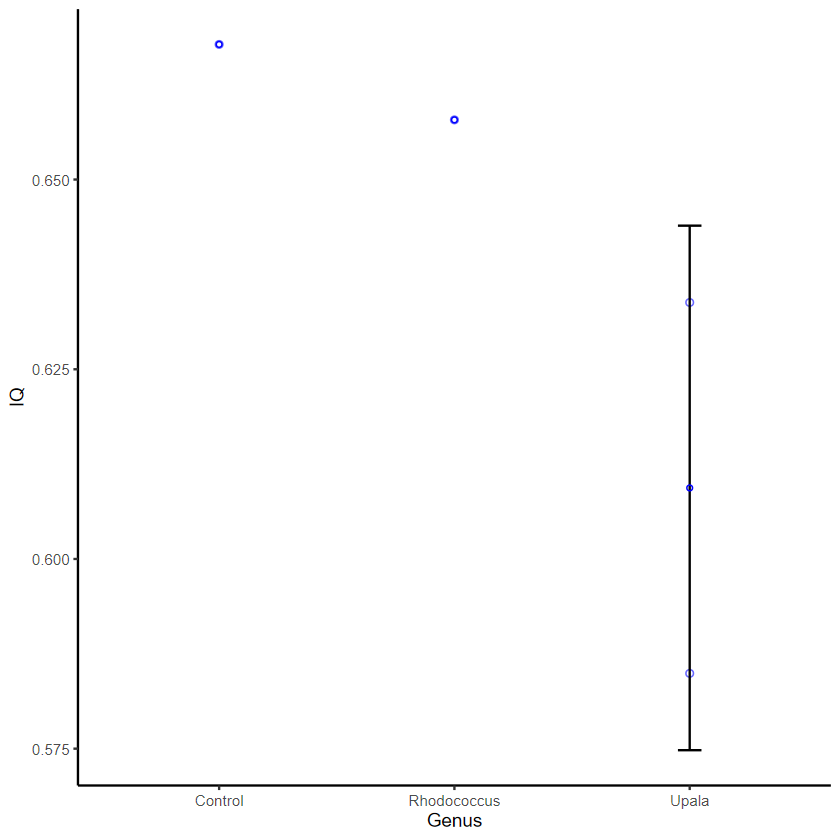

In [15]:
## Distribution top plot data
summary_top_data <- IQ_Summary_top %>%
  group_by(ATTRIBUTE_Genus) %>%
  summarise(
    mean_IQ = mean(IQ, na.rm = TRUE),
    sd_IQ = sd(IQ, na.rm = TRUE),
    .groups = 'drop'
  )
## Distribution top plot
Distribution_top_plot = ggplot() +
  geom_point(data = IQ_Summary_top, aes(x = ATTRIBUTE_Genus, y = IQ), 
             shape = 1, color = "blue", size = 1.5, alpha = 0.6) +  # Points for individual IQ values
  geom_errorbar(data = summary_top_data, 
                aes(x = ATTRIBUTE_Genus, ymin = mean_IQ - sd_IQ, ymax = mean_IQ + sd_IQ), 
                width = 0.1, color = "Black") +  # Error bars for mean IQ
  geom_point(data = summary_top_data, aes(x = ATTRIBUTE_Genus, y = mean_IQ), 
             shape = 1, color = "blue", size = 1) +  # Points for mean IQ
  labs(
    x = "Genus", 
    y = "IQ") +
  theme_classic() 

Distribution_top_plot

# Save the distribution plot
ggsave("Data/IQ_Plot/6_Distribution_top_plot.png", plot = Distribution_top_plot, width = 15, height = 8)
ggsave("Data/IQ_Plot/6_Distribution_top_plot.svg", plot = Distribution_top_plot, width = 15, height = 8)

## Two files are generated per sample:
## _strata_counts_SI_MQS: This summarizes the number of nodes per stratum and the calculation of the Shannon MQS index.
## _data_MQS: This summarizes the scores in the corresponding sample and their MQScore value.
## Two files are generated per sample:
## _strata_counts_SI_MQS: This summarizes the number of nodes per stratum and the calculation of the Shannon MQS index.
## _data_MQS: This summarizes the scores in the corresponding sample and their MQScore value.



In [ ]:
# NPAtlas integration

In [ ]:
 ## Calculate total nodes per sample
Total_nodes_per_Species <- df_nodes %>%
  select(id, ATTRIBUTE_Species, MQScore) %>% 
  separate_rows(ATTRIBUTE_Species, sep = "\\,") %>%  
  group_by(ATTRIBUTE_Species)

# Count total nodes per Species
Total_nodes <- table(Total_nodes_per_Species$ATTRIBUTE_Species)
Total_nodes <- as.data.frame(Total_nodes)
colnames(Total_nodes) <- c("ATTRIBUTE_Species", "Count")

download_link <- "https://www.npatlas.org/static/downloads/NPAtlas_download.xlsx"
download.file(download_link, destfile = "NPAtlas_data.xlsx", mode = "wb")
NPAtlas_data <- read_excel("NPAtlas_data.xlsx")
NPAtlas_data= NPAtlas_data %>% select(compound_name, compound_inchi, compound_smiles, origin_type, genus, origin_species)

# Extract index inputs
score_MQS <- df_nodes %>%
  select(id, MQScore, ATTRIBUTE_Species, Smiles, INCHI, Compound_Name) %>%
  filter(!is.na(MQScore) & MQScore != "") # Extract MSQ and remove NAs

# canonizise smiles
NPAtlas_data$Canonical_Smiles <- sapply(NPAtlas_data$compound_smiles, function(smiles) {
  mol <- parse.smiles(smiles)[[1]]
  get.smiles(mol)
})
NPAtlas_data= NPAtlas_data %>% select(-compound_smiles)

score_MQS$Canonical_Smiles= sapply(score_MQS$Smiles, function(smiles){
  mol <- parse.smiles(smiles)
  if (is.null(mol[[1]])) {
    return(NA)  
  } else {
    return(get.smiles(mol[[1]]))
  }
})

score_MQS= score_MQS %>% select(-Smiles)

# get NPAtlas anotations

#By smiles
MQS_score_NPAtlas_smiles <- left_join(score_MQS, NPAtlas_data, by = "Canonical_Smiles", 
                                      relationship = "many-to-many")%>% filter(!is.na(origin_type))
# By inchi
MQS_score_NPAtlas_inchi <- left_join(score_MQS, NPAtlas_data, 
                                     by = c("INCHI" = "compound_inchi"), 
                                     relationship = "many-to-many") %>%
  filter(!is.na(origin_type))

#By name
MQS_score_NPAtlas_name <- left_join(score_MQS, NPAtlas_data, 
                                    by = c("Compound_Name" = "compound_name"), 
                                    relationship = "many-to-many") %>%
  filter(!is.na(origin_type))


# COMBINE
MQS_score_NPAtlas <- bind_rows(MQS_score_NPAtlas_smiles, MQS_score_NPAtlas_inchi, MQS_score_NPAtlas_name) %>% 
  distinct(id, .keep_all = TRUE) %>%
  select(id, MQScore, ATTRIBUTE_Species)  %>% 
  separate_rows(ATTRIBUTE_Species, sep = "\\,") %>%  
  group_by(ATTRIBUTE_Species)

MQS_score_NPAtlas<-merge(MQS_score_NPAtlas, Metadata, 
                         by.x = "ATTRIBUTE_Species", by.y = "ATTRIBUTE_Species", all.x = TRUE)

MQS_score_NPAtlas <- MQS_score_NPAtlas %>%
  select(id, MQScore, ATTRIBUTE_Species) %>%
  filter(!is.na(ATTRIBUTE_Species)) %>%
  distinct(id, ATTRIBUTE_Species, .keep_all = TRUE)

# Count nodes with annotated Species information
nodes_annotated_Species_NPAtlas <- table(MQS_score_NPAtlas$ATTRIBUTE_Species)
nodes_annotated_Species_NPAtlas <- as.data.frame(nodes_annotated_Species_NPAtlas)
colnames(nodes_annotated_Species_NPAtlas) <- c("ATTRIBUTE_Species", "Count")

## Define strata for MQScore
MQS_breaks <- seq(0.00, 1, by = 0.05)
strata_MQS <- setNames(
  lapply(seq_along(MQS_breaks)[-length(MQS_breaks)], function(i) c(MQS_breaks[i], MQS_breaks[i + 1])),
  paste0(sprintf("%.2f", MQS_breaks[-length(MQS_breaks)]), "-", sprintf("%.2f", MQS_breaks[-1])))

## Function to stratify and count values, ignoring NAs
stratify_and_count_unique <- function(df, column, strata) {
  unique_df <- df %>% 
    group_by(id) %>% 
    slice(1) %>%  # Count only the first occurrence of each unique identifier (id) in the specified column
    ungroup()
  
  # Count unique values for each stratum
  counts <- sapply(strata, function(range) {
    sum(unique_df[[column]] >= range[1] & unique_df[[column]] < range[2], na.rm = TRUE)
  })
  
  return(counts)
}


# Initialize empty lists to store results
strata_counts <- list()
individual_dfs <- list()

# Loop over each unique sample
for (sample_name in unique(MQS_score_NPAtlas$ATTRIBUTE_Species)) {
  # Create a temporary dataframe for the individual sample
  individual_df <- MQS_score_NPAtlas %>%
    filter(ATTRIBUTE_Species == sample_name) %>%
    select(id, MQScore)
  
  # Count unique values in each stratum for MQScore
  MQScore_counts <- stratify_and_count_unique(individual_df, "MQScore", strata_MQS)
  
  # Create a dataframe with consistent strata names, ensuring that all strata are represented
  counts_df <- data.frame(
    Stratum = names(strata_MQS),
    MQScore_Count = rep(0, length(strata_MQS))  # Initialize with zeros
  )
  
  # Populate the counts for the strata that exist
  for (i in seq_along(names(strata_MQS))) {
    stratum_name <- names(strata_MQS)[i]
    if (stratum_name %in% names(MQScore_counts)) {
      counts_df$MQScore_Count[i] <- MQScore_counts[[stratum_name]]
    }
  }
  
  # Store the results in lists
  strata_counts[[sample_name]] <- counts_df
  individual_dfs[[sample_name]] <- individual_df
}

if (!dir.exists("Data/CSV_IQNPA")) {
  dir.create("Data/CSV_IQNPA", recursive = TRUE)}

## Save each individual dataframe and the strata counts to CSV files in the CSV_IQ folder
for(sample_name in names(individual_dfs)) {
  # Save individual dataframe to CSV
  write.csv(individual_dfs[[sample_name]], 
            file = paste0("Data/CSV_IQNPA/", sample_name, "_NPAtlas_data_MQS.csv"), 
            row.names = FALSE)
  
  # Save strata counts to CSV
  write.csv(strata_counts[[sample_name]], 
            file = paste0("Data/CSV_IQNPA/", sample_name, "_NPAtlas_strata_counts.csv"), 
            row.names = FALSE)
  
  # Assign each dataframe to a variable in the R environment
  assign(paste0("NPAtlas_data_", sample_name), 
         individual_dfs[[sample_name]], 
         envir = .GlobalEnv)  # Specify environment to ensure it's assigned globally
  assign(paste0(sample_name, "_NPAtlas_strata_counts"), 
         strata_counts[[sample_name]], 
         envir = .GlobalEnv)
}

## Create a data frame to store strain names
Species <- data.frame(Total_nodes$ATTRIBUTE_Species)
colnames(Species) <- c("Species")
Species <- Species$Species

## Create an empty dataframe for the summary
shannon_summary_MQS <- data.frame(Species = character(), Shannon_Index = numeric(), stringsAsFactors = FALSE)

## Iterate over each strain
for (Species in Species) {
  # Name of the corresponding dataframe
  df_name <- paste0(Species, "_NPAtlas_strata_counts")
  
  # Check if the dataframe exists
  if (exists(df_name)) {
    df_strata_counts <- get(df_name)
    
    # Obtain the total count for this strain from Total_nodes
    total <- Total_nodes$Count[Total_nodes$ATTRIBUTE_Species == Species]
    
    # Check that the total is greater than zero
    if (total > 0) {
      # Calculate the proportion (pi) for each stratum and add it as a new column
      df_strata_counts$pi <- df_strata_counts$MQScore_Count / total
      
      # Add a column with the total count
      df_strata_counts$Total <- total
      
      # Calculate pi * ln(pi), handling the case where pi = 0
      df_strata_counts$pi_ln_pi <- ifelse(df_strata_counts$pi > 0, df_strata_counts$pi * log(df_strata_counts$pi), 0)
    } else {
      # If the total is zero, assign NA to the new columns
      df_strata_counts$pi <- NA
      df_strata_counts$Total <- NA
      df_strata_counts$pi_ln_pi <- NA
    }
    
    # Calculate the Shannon index as -sum(pi * ln(pi))
    shannon_index <- -sum(df_strata_counts$pi_ln_pi, na.rm = TRUE)
    
    # Append the Shannon index to the summary
    shannon_summary_MQS <- rbind(shannon_summary_MQS, data.frame(Species = Species, Shannon_Index = shannon_index))
    
    # Clean column names to remove any whitespace
    colnames(df_strata_counts) <- trimws(colnames(df_strata_counts))
    
    # Check if the dataframe has rows
    if (nrow(df_strata_counts) > 0) {
      # Define required columns
      required_columns <- c("Stratum", "MQScore_Count", "pi", "Total", "pi_ln_pi", "shannon_index")
      
      # Check for missing columns
      missing_columns <- setdiff(required_columns, colnames(df_strata_counts))
      if (length(missing_columns) > 0) {
        warning(paste("The following columns are missing in the dataframe:", paste(missing_columns, collapse = ", ")))
      } else {
        # Select only the relevant columns
        df_strata_counts <- df_strata_counts[, required_columns]
        
        # Add the Shannon index as a new column (same for all strata)
        df_strata_counts$shannon_index <- shannon_index
        
        # Save the updated dataframe to a CSV file
        write.csv(df_strata_counts, file = paste0("Data/CSV_IQ/", df_name, "_SI_MQS.csv"), row.names = FALSE)
      }
    } else {
      warning("The dataframe df_NPAtlas_strata_counts is empty.")
    }
  } else {
    warning(paste("The dataframe", df_name, "does not exist."))
  }
}
warnings()

## Save the overall Shannon summary to a CSV file
write.csv(shannon_summary_MQS, file = "Data/CSV_IQNPA/1_Shannon_NPAtlas_Summary_MQS.csv", row.names = FALSE)

# Extract index input: COS_score

# Get cosine scores where node2 matches the id in score_MQS
score_COS_node1 <- df_edges %>%
  select(node1, cosine_score, node2) %>%
  semi_join(MQS_score_NPAtlas, by = c("node2" = "id")) # Retrieve cosine values from node to node

# Get complementary cosine scores where node1 matches the id in score_MQS
score_COS_node2 <- df_edges %>%
  select(node2, cosine_score, node1) %>%
  semi_join(MQS_score_NPAtlas, by = c("node1" = "id")) # Retrieve complementary cosine values

## Combine interactions into a single dataframe
combined_interactions <- bind_rows(
  score_COS_node1 %>% mutate(direction = "Score_COS_node1"),
  score_COS_node2 %>% mutate(direction = "Score_COS_node2")
) # Add a new column called direction to indicate the source node of the interaction.

# Create a combined node column based on direction
combined_interactions <- combined_interactions %>% mutate(
  combined_nodes = ifelse(direction == "Score_COS_node1",
                          paste(node1, node2, sep = "/"),
                          paste(node2, node1, sep = "/"))
) # If “Score_COS_node1”, concatenate node1 and node2; else, concatenate node2 and node1.

# Separate combined nodes into nodeA and nodeB
combined_interactions <- combined_interactions %>%
  separate(combined_nodes, into = c("nodeA", "nodeB"), sep = "/") # Assign nodeA as the node of interest.

## Remove rows where nodeA and nodeB are the same (singlets)
combined_interactions <- combined_interactions[combined_interactions$nodeA != combined_interactions$nodeB, ]

# Select relevant columns for cosine scores
score_COS <- combined_interactions %>%
  select(nodeA, cosine_score) # Filter cosine values for the node of interest.

# Merge cosine scores with node metadata
score_COS <- merge(score_COS, df_nodes, by.x = "nodeA", by.y = "id", all = TRUE)  
# Note: MQS values are repeated when there are multiple COS scores, as intended.

# Clean up score_COS dataframe
score_COS <- score_COS %>% select(nodeA, cosine_score, ATTRIBUTE_Species) %>% 
  filter(!is.na(cosine_score) & cosine_score != "") %>% 
  separate_rows(ATTRIBUTE_Species, sep = "\\,") %>%  
  group_by(ATTRIBUTE_Species)

# Rename columns for clarity
colnames(score_COS) <- c("id", "Cosine_score", "ATTRIBUTE_Species")

# Merge with metadata to include additional information
score_COS <- merge(score_COS, Metadata, 
                   by.x = "ATTRIBUTE_Species", by.y = "ATTRIBUTE_Species", all.x = TRUE)

# Final selection of relevant columns
score_COS <- score_COS %>% select(id, Cosine_score, ATTRIBUTE_Species)

## Define strata for cosine score
cos_breaks <- seq(0.70, 1.00, by = 0.05) # Define breaks for cosine scores
strata_COS <- setNames(
  lapply(seq_along(cos_breaks)[-length(cos_breaks)], function(i) c(cos_breaks[i], cos_breaks[i + 1])),
  paste0(sprintf("%.2f", cos_breaks[-length(cos_breaks)]), "-", sprintf("%.2f", cos_breaks[-1])))


## Function to stratify and count values, ignoring NAs
stratify_and_count <- function(df, column, strata) {
  counts <- sapply(strata, function(range) {
    sum(df[[column]] >= range[1] & df[[column]] < range[2], na.rm = TRUE) # Count values within each stratum
  })
  return(counts)
}

## Create lists to save individual df and strata counts
individual_dfs_COS <- list()
strata_counts_COS <- list()

## For each sample, create an individual df and strata counts
for (sample_name in unique(score_COS$ATTRIBUTE_Species)) {
  individual_df <- score_COS %>%
    filter(ATTRIBUTE_Species == sample_name) %>%
    select(id, Cosine_score)
  
  # Counting unique values in each stratum for Cosine score
  cosine_score_counts <- stratify_and_count(individual_df, "Cosine_score", strata_COS)
  
  # Create a dataframe for the counts
  counts_df <- data.frame(Stratum = names(cosine_score_counts), Count = cosine_score_counts)
  
  # Store count dataframe in the list
  strata_counts_COS[[sample_name]] <- counts_df
  
  # Assign the individual dataframe to the list
  individual_dfs_COS[[sample_name]] <- individual_df
}

## Save each individual dataframe and the strata counts to CSV files in the CSV_IQ folder
for(sample_name in names(individual_dfs_COS)) {
  write.csv(individual_dfs_COS[[sample_name]], file = paste0("Data/CSV_IQNPA/", sample_name, "_data_COS.csv"), row.names = FALSE)
  
  
  # Assign each dataframe to a variable in the R environment
  assign(paste0("data_COS_", sample_name), individual_dfs_COS[[sample_name]])
  assign(paste0("strata_counts_COS_", sample_name), strata_counts_COS[[sample_name]])
}

## name list (strains)
Species <- unique(Total_nodes$ATTRIBUTE_Species)

## df for summary
shannon_summary_cos <- data.frame(Species = character(), Shannon_Index = numeric(), stringsAsFactors = FALSE)

# Iterate through each strain
for (Species in Species) {
  # Create dataframe name
  df_name <- paste0("strata_counts_COS_",Species)
  
  if (exists(df_name)) {
    # Retrieve the dataframe
    df_strata_counts <- get(df_name)
    
    # Obtain total node for each Species from total_nodes
    total <- Total_nodes$Count[Total_nodes$ATTRIBUTE_Species == Species]
    
    if (total > 0) {
      if ("Count" %in% colnames(df_strata_counts)) {
        # Calculate the proportion (pi) for each stratum and add it as a new column
        df_strata_counts$pi <- df_strata_counts$Count / total
        
        # Add a column with the total number
        df_strata_counts$Total <- total
        
        # Calculate pi * ln(pi), handling the case of pi = 0
        df_strata_counts$pi_ln_pi <- ifelse(df_strata_counts$pi > 0, df_strata_counts$pi * log(df_strata_counts$pi), 0)
      } else {
        warning(paste("The column 'Count' does not exist in the dataframe", df_name))
        df_strata_counts$pi <- NA
        df_strata_counts$Total <- NA
        df_strata_counts$pi_ln_pi <- NA
      }
    } else {
      df_strata_counts$pi <- NA
      df_strata_counts$Total <- NA
      df_strata_counts$pi_ln_pi <- NA
    }
    
    # Calculate Shannon Index (SI)
    shannon_index <- -sum(df_strata_counts$pi_ln_pi, na.rm = TRUE)
    df_strata_counts$shannon_index <- shannon_index
    
    # Append the strain and Shannon index to the summary
    shannon_summary_cos <- rbind(shannon_summary_cos, data.frame(Species = Species, Shannon_Index = shannon_index))
    
    # Reorder columns and save the dataframe
    df_strata_counts <- df_strata_counts[, c("Stratum", "Count", "pi", "Total", "pi_ln_pi", "shannon_index")]
    write.csv(df_strata_counts, file = paste0("Data/CSV_IQNPA/", df_name, "_SI_COS.csv"), row.names = FALSE)
    
  } else {
    # If dataframe does not exist, create a dataframe with Count = 0 and Shannon index = 0
    df_strata_counts <- data.frame(Stratum = NA, Count = 0, pi = NA, Total = 0, pi_ln_pi = NA, shannon_index = 0)
    
    # Append Shannon index = 0 to the summary
    shannon_summary_cos <- rbind(shannon_summary_cos, data.frame(Species = Species, Shannon_Index = 0))
    
    # Save the empty dataframe
    write.csv(df_strata_counts, file = paste0("Data/CSV_IQNPA/", df_name, "_SI_COS.csv"), row.names = FALSE)
    
    # Display a warning about the missing dataframe
    warning(paste("The dataframe", df_name, "does not exist. A dataframe with count 0 and Shannon index 0 was generated."))
  }
} 

# Save the Shannon summary
write.csv(shannon_summary_cos, file = "Data/CSV_IQNPA/1_COS_shannon_index_summary.csv", row.names = FALSE)
shannon_summary_cos <- shannon_summary_cos %>%
  distinct()

# Annotated nodes per sample
Proportion_Annotated_nodes= merge(nodes_annotated_Species_NPAtlas, Total_nodes, by.x = "ATTRIBUTE_Species", by.y = "ATTRIBUTE_Species")
Proportion_Annotated_nodes$Ans=Proportion_Annotated_nodes$Count.x/Proportion_Annotated_nodes$Count.y
Proportion_Annotated_nodes= Proportion_Annotated_nodes %>% select(-Count.x, -Count.y)

# Parameters union

IQNP <- merge(Proportion_Annotated_nodes, shannon_summary_cos, by.x = "ATTRIBUTE_Species", by.y = "Species", all = TRUE)
IQNP <- merge(IQNP, shannon_summary_MQS, by.x = "ATTRIBUTE_Species", by.y = "Species", all = TRUE)
colnames(IQNP)= c("ATTRIBUTE_Species", "Ans", "Hcos", "Hmqs")

# Scaling
IQNP$Hcos[is.na(IQNP$Hcos)] <- 0
IQNP$Hmqs[is.na(IQNP$Hmqs)] <- 0
IQNP$Ans[is.na(IQNP$Ans)] <- 0
IQNP$Hmqs <- (IQNP$Hmqs) / (max(IQNP$Hmqs))
IQNP$Hcos <- (IQNP$Hcos) / (max(IQNP$Hcos))


IQNP$IQNP <- (IQNP$Ans * Weigh_Ans) + (IQNP$Hcos * Weigh_Hcos) + (IQNP$Hmqs * Weigh_Hmqs)

IQNP = merge(IQNP, Metadata, by.x = "ATTRIBUTE_Species", by.y = "ATTRIBUTE_Species")
IQNP= IQNP %>% select(IQNP,Hmqs,Hcos, Ans, ATTRIBUTE_Genus, ATTRIBUTE_Species)
IQ_NPA <- IQNP %>%
  distinct()


# IQ plot
IQ_plot = ggplot(IQ_NPA, aes(x = reorder(ATTRIBUTE_Species, -IQNP), y = IQNP, fill = ATTRIBUTE_Species)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "Black", width = 0.7, show.legend = TRUE) +  
  theme_classic() + 
  labs(x = "Species",
       y = "IQNP",
       fill = "Genus") + 
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 22),  
    axis.text.x = element_text(angle = 0, hjust = 1, size = 22),  
    axis.text.y = element_text(size = 22),
    axis.title.y = element_text(size = 22),
    axis.title.x = element_text(size = 22),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.text = element_text(size = 22),  
    legend.title = element_text(size = 22)  
  )+ scale_fill_viridis_d()

if (!dir.exists("Data/IQNPA_Plot")) {
  dir.create("Data/IQNPA_Plot", recursive = TRUE)}

  IQ_plot

ggsave("Data/IQNPA_Plot/1_IQ_Plot.png", plot = IQ_plot, width = 15, height = 8)
ggsave("Data/IQNPA_Plot/1_IQ_Plot.svg", plot = IQ_plot, width = 15, height = 8)

# Distribution Plot
summary_data <- IQ_NPA %>%
  group_by(ATTRIBUTE_Genus) %>%
  summarise(
    mean_IQ = mean(IQNP, na.rm = TRUE),  # Calculate mean IQ
    sd_IQ = sd(IQNP, na.rm = TRUE),      # Calculate standard deviation of IQ
    .groups = 'drop'                   # Drop grouping structure
  )

Distribution_plot = ggplot() +
  geom_point(data = IQNP, aes(x = ATTRIBUTE_Genus, y = IQNP), 
             shape = 1, color = "blue", size = 1.5, alpha = 0.6) + 
  geom_errorbar(data = summary_data, 
                aes(x = ATTRIBUTE_Genus, ymin = mean_IQ - sd_IQ, ymax = mean_IQ + sd_IQ), 
                width = 0.1, color = "black") +  
  geom_point(data = summary_data, aes(x = ATTRIBUTE_Genus, y = mean_IQ), 
             shape = 1, color = "blue", size = 1) +  
  labs(
    x = "", 
    y = "IQNP") +  
  theme_classic() +
  theme(
    axis.title.x = element_text(size = 14),  
    axis.title.y = element_text(size = 14),  
    axis.text.x = element_text(size = 12),    
    axis.text.y = element_text(size = 12),    
    axis.line = element_line(size = 1)        
  ) 
Distribution_plot
# Save the Distribution Plot as a PNG file
ggsave("Data/IQNPA_Plot/2_Distribution_plot.png", plot = Distribution_plot, width = 15, height = 8)
ggsave("Data/IQNPA_Plot/2_Distribution_plot.svg", plot = Distribution_plot, width = 15, height = 8)

# Create Boxplot
Boxplot = ggplot(IQ_NPA, aes(x = ATTRIBUTE_Genus, y = IQNP)) +
  geom_boxplot(outlier.shape = NA, fill = NA, color = "black", width = 0.1) +  # Boxplot without outliers
  geom_point(aes(color = "Individual Points"), shape = 1, size = 3, alpha = 0.6) +  # Individual points
  scale_color_manual(values = "blue") +  # Manual color for points
  labs(
    x = "", 
    y = "IQNP") +  # Axis labels
  theme_classic() +  # Minimalist theme
  theme(legend.position = "none")  # Remove legend

Boxplot
# Save the Boxplot as a PNG file
ggsave("Data/IQNPA_Plot/3_Boxplot.png", plot = Boxplot, width = 15, height = 8)
ggsave("Data/IQNPA_Plot/3_Boxplot.svg", plot = Boxplot, width = 15, height = 8)


# Summary of top 10 lowest IQ
IQ_Summary_top <- IQ_NPA %>%
  arrange(IQ_NPA) %>%
  slice_head(n = 10)

## IQ top plot
IQ_top_plot = ggplot(IQ_Summary_top, aes(x = reorder(ATTRIBUTE_Species, -IQNP), y = IQNP, fill = ATTRIBUTE_Genus)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "Black", width = 0.7, show.legend = TRUE) +  
  theme_classic() + 
  labs(x = "",
       y = "IQNP",
       fill = "Genus") + 
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),  
    axis.text.x = element_text(angle = 0, hjust = 1, size = 10),  
    axis.text.y = element_text(size = 14),  
    axis.title = element_text(face = "bold"),  
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.text = element_text(size = 14),  
    legend.title = element_text(size = 14)  
  )+ scale_fill_viridis_d()

IQ_top_plot
## Save the plot
ggsave("Data/IQNPA_Plot/5_IQ_top_Plot.png", plot = IQ_top_plot, width = 15, height = 8)
ggsave("Data/IQNPA_Plot/5_IQ_top_Plot.svg", plot = IQ_top_plot, width = 15, height = 8)

## Distribution top plot data
summary_top_data <- IQ_Summary_top %>%
  group_by(ATTRIBUTE_Genus) %>%
  summarise(
    mean_IQ = mean(IQNP, na.rm = TRUE),
    sd_IQ = sd(IQNP, na.rm = TRUE),
    .groups = 'drop'
  )

## Distribution top plot
Distribution_top_plot = ggplot() +
  geom_point(data = IQ_Summary_top, aes(x = ATTRIBUTE_Genus, y = IQNP), 
             shape = 1, color = "blue", size = 1.5, alpha = 0.6) +  # Points for individual IQ values
  geom_errorbar(data = summary_top_data, 
                aes(x = ATTRIBUTE_Genus, ymin = mean_IQ - sd_IQ, ymax = mean_IQ + sd_IQ), 
                width = 0.1, color = "Black") +  # Error bars for mean IQ
  geom_point(data = summary_top_data, aes(x = ATTRIBUTE_Genus, y = mean_IQ), 
             shape = 1, color = "blue", size = 1) +  # Points for mean IQ
  labs(
    x = "Genus", 
    y = "IQNP") +
  theme_classic() 

Distribution_top_plot
# Save the distribution plot
ggsave("Data/IQNPA_Plot/6_Distribution_top_plot.png", plot = Distribution_top_plot, width = 15, height = 8)
ggsave("Data/IQNPA_Plot/6_Distribution_top_plot.svg", plot = Distribution_top_plot, width = 15, height = 8)


You calculated the IQ and the IQ, do you want to compare them? Run the workflow

In [ ]:
# IQ vs IQNP

# Combine the two data frames by matching on ATTRIBUTE_Species and ATTRIBUTE_Genus
combined_data <- data.frame(
  ATTRIBUTE_Species = IQ$ATTRIBUTE_Species,
  ATTRIBUTE_Genus = IQ$ATTRIBUTE_Genus,
  IQ = IQ$IQ,
  IQ_NP = IQ_NPA$IQ
)
colnames(combined_data)=c("ATTRIBUTE_Species", "ATTRIBUTE_Genus", "IQ", "IQNP")
# Plotting IQ vs IQ_NP, differentiating by ATTRIBUTE_Bacteria

correlation <- cor(combined_data$IQ, combined_data$IQNP, use = "complete.obs")
correlation
IQ_vs_IQ_NP_Plot <- ggplot(combined_data, aes(x = IQ, y = IQNP, color = ATTRIBUTE_Genus)) +
  geom_point(size = 4, alpha = 0.7) +  # Adjusting point transparency and size
  geom_smooth(method = "lm", linetype = "dashed", color = "black", fill = "lightgray") +  # Confidence interval
  labs(title = "",
       x = "IQ",
       y = "IQNP") +
  theme_classic() +
  theme(
    axis.text = element_text(size = 12),  
    axis.title = element_text(size = 14),  
    plot.title = element_text(hjust = 0.5, size = 16)  
  ) +
  annotate("text", x = Inf, y = Inf, label = paste("R: ", round(correlation, 2)), 
           hjust = 3, vjust = 10, size = 5, color = "black") +
  scale_color_viridis_d() 
IQ_vs_IQ_NP_Plot
ggsave("Data/IQNPA_Plot/12_IQ_IQNP_SPlot.png", plot = IQ_vs_IQ_NP_Plot, width = 15, height = 8)
ggsave("Data/IQNPA_Plot/12_IQ_IQNP_SPlot.svg", plot = IQ_vs_IQ_NP_Plot, width = 15, height = 8)


# parameters IQ plot
IQ_long <- IQ %>%
  pivot_longer(cols = c("Ans", "Hcos", "Hmqs"), 
               names_to = "Parameter", 
               values_to = "Value") %>%
  mutate(Value = Value / 3)  
IQ_long <- IQ_long %>%
  group_by(ATTRIBUTE_Species) %>%
  mutate(Total = sum(Value)) %>%
  ungroup() %>%
  arrange(desc(Total))


IQ_plot <- ggplot(IQ_long, aes(x = reorder(ATTRIBUTE_Species, -Total), y = Value, fill = Parameter)) +
  geom_bar(stat = "identity") +  # Stacked bars
  labs(x = "Species", 
       y = "IQ Parameter value", 
       title = "") +
  theme_classic() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1, size = 16),  
    axis.text.y = element_text(size = 16),
    axis.title = element_text(size = 18),
    plot.title = element_text(hjust = 0.5, size = 16),
    legend.text = element_text(size = 20),  
    legend.title = element_text(size = 18) 
  ) +
  scale_fill_brewer(palette = "Set2")  


print(IQ_plot)
ggsave("Data/IQ_Plot/12_IQ_input_plot.png", plot = IQ_plot, width = 15, height = 8)
ggsave("Data/IQ_Plot/12_IQ_input_plot.svg", plot = IQ_plot, width = 15, height = 8)


# parameters IQNP plot
IQ_NPA_long <- IQ_NPA %>%
  pivot_longer(cols = c("Ans", "Hcos", "Hmqs"), 
               names_to = "Parameter", 
               values_to = "Value")%>%
  mutate(Value = Value / 3)

IQ_NPA_long  <- IQ_NPA_long  %>%
  group_by(ATTRIBUTE_Species) %>%
  mutate(Total = sum(Value)) %>%
  ungroup() %>%
  arrange(desc(Total))  

IQ_NPA_plot  <- ggplot(IQ_NPA_long , aes(x = reorder(ATTRIBUTE_Species, -Total), y = Value, fill = Parameter)) +
  geom_bar(stat = "identity") +  # Stacked bars
  labs(x = "Species", 
       y = "IQNP Input value", 
       title = "") +
  theme_classic() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1, size = 16),  # Adjust x-axis labels
    axis.text.y = element_text(size = 16),
    axis.title = element_text(size = 18),
    plot.title = element_text(hjust = 0.5, size = 16),
    legend.text = element_text(size = 20),  
    legend.title = element_text(size = 18) 
  ) +
  scale_fill_brewer(palette = "Set2")  # Use a color palette for different parameters


print(IQ_NPA_plot)
ggsave("Data/IQNPA_Plot/12_IQNP_input_plot.png", plot = IQ_NPA_plot, width = 15, height = 8)
ggsave("Data/IQNPA_Plot/12_IQNP_input_plot.svg", plot = IQ_NPA_plot, width = 15, height = 8)